In [48]:
import re
from _ast import keyword

import numpy as np
import matplotlib.pyplot as plt

# adjust matplotlib defaults to personal preferences
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


# Exercise 1: Make encoder and decoder functions

In [49]:
# list of sentences
text = [ 'All that we are is the result of what we have thought',
         'To be or not to be that is the question',
         'Be yourself everyone else is already taken' ]

# create a vocab of unique words
allwords=re.split(r'\s', ' '.join(text).lower())
vocab=sorted(set(allwords))

In [50]:
# create an encoder and decoder dictionaries
word2idx={word:i for i,word in enumerate(vocab)}
idx2word={i:word for i,word in enumerate(vocab)}
word2idx

{'all': 0,
 'already': 1,
 'are': 2,
 'be': 3,
 'else': 4,
 'everyone': 5,
 'have': 6,
 'is': 7,
 'not': 8,
 'of': 9,
 'or': 10,
 'question': 11,
 'result': 12,
 'taken': 13,
 'that': 14,
 'the': 15,
 'thought': 16,
 'to': 17,
 'we': 18,
 'what': 19,
 'yourself': 20}

# Exercise 2: Wrap the encoder/decoder into functions

In [63]:
### the key and value function
"""
def keyValue(txt):
    allwords= re.split(r'\s', ' '.join(txt).lower())
    vocab=sorted(set(allwords))
    word2idx={word:i for i, word in enumerate(vocab)}
    return word2idx

def valueKey(txt):
    allwords= re.split(r'\s', ' '.join(txt).lower())
    vocab=sorted(set(allwords))
    idx2word={i:word for i, word in enumerate(vocab)}
    return idx2word
"""
### the encoder function

def encoder(text):
    words = re.split(' ',text.lower())
    return [word2idx[word] for word in words]


def decoder(indices):
    return ' '.join([idx2word[idx] for idx in indices])

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mdsan\AppData\Local\Temp\ipykernel_17284\3608777313.py:4: SyntaxWarning: invalid escape sequence '\s'
  allwords= re.split(r'\s', ' '.join(txt).lower())


In [65]:
# create a new sentence using the vocab
newtext = 'we already are the result of what ' \
          'everyone else already thought'
#keyValue(newtext)
#valueKey(newtext)

encode_tokenId=encoder(newtext)
decode_text=decoder(encode_tokenId)
print('Original text: ',newtext)
print('Encoded text: ',encode_tokenId)
print('Decoded text: ',decode_text)

Original text:  we already are the result of what everyone else already thought
Encoded text:  [18, 1, 2, 15, 12, 9, 19, 5, 4, 1, 16]
Decoded text:  we already are the result of what everyone else already thought


# Exercise 3: Visualize the tokens

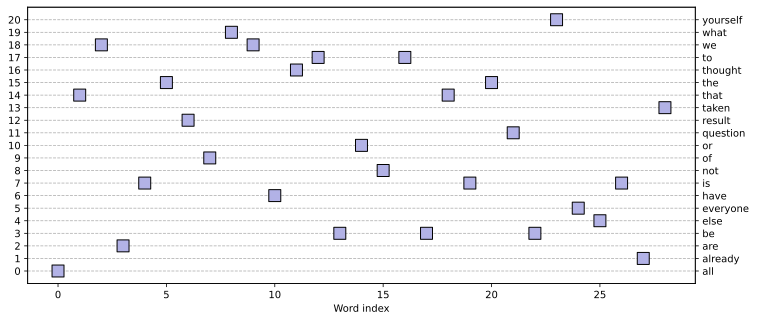

In [66]:
# get all the text and all the tokens
alltext=' '.join(text)
tokens=encoder(alltext)

# create a figure
_,ax=plt.subplots(1, figsize=(12,5))

# plot the tokens
ax.plot(tokens,'ks',markersize=12,markerfacecolor=[.7,.7,.9])
ax.set(xlabel='Word index',yticks=range(len(vocab)))
ax.grid(linestyle='--',axis='y')

# invisible axis for right-hand-side labels
ax2 = ax.twinx()
ax2.plot(tokens,alpha=0)
ax2.set(yticks=range(len(vocab)),yticklabels=vocab)

plt.show()

# Exercise 4: Explore context surrounding target tokens

In [73]:
# what words are in the context of "to"

targetword='to'
targetIdx=word2idx[targetword]

# find indices
targetLocs=np.where(np.array(allwords)==targetword)[0]
print(f'"{targetword}" appears in indices {targetLocs}\n\n')

# print context
for t in targetLocs:
    print(tokens[t-1:t+2])
    print(' '.join(allwords[t-1:t+2]),'\n')

"to" appears in indices [12 16]


[16, 17, 3]
thought to be 

[8, 17, 3]
not to be 



# Exercise 5: One-hot encoding

In [76]:
word_matrix=np.zeros((len(allwords),len(vocab)),dtype=int)

# create the matrix
for i, word in enumerate(allwords):
    word_matrix[i,word2idx[word]]=1

# show the results
print(f'One-hot encoding matrix is of size {word_matrix.shape}\n')
print(word_matrix)

One-hot encoding matrix is of size (29, 21)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 

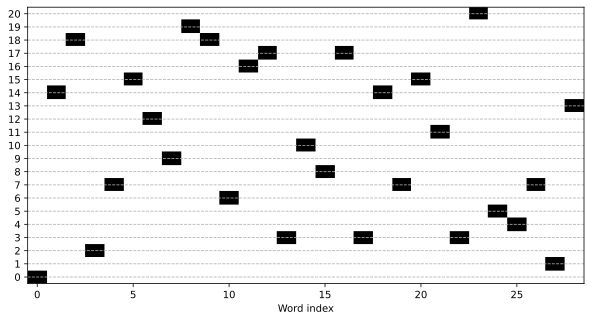

In [79]:
# the image of the one-hot encoding matrix is the same as in Exercise 2
_,ax = plt.subplots(1,figsize=(10,5))

plt.imshow(1-word_matrix.T,cmap='gray',origin='lower',aspect='auto')
ax.set(xlabel='Word index',yticks=range(len(vocab)))
ax.grid(linestyle='--',axis='y')
plt.show()